## Module 3, Section 3: Annotating and Saving Your Visualisations

Sometimes plot annotations can help guide your audience to decode your visualisation, by highlighting a specific region or point of interest. Matplotlib has a pretty good summary of how to annotate Python figures ([here](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)). We're going to start with the taxis time series figure we've already used, then you'll be given some movement data from Google showing the change in people's activity in different Australian cities during 2020. We'll finish by showing you how to save a figure to access as an image outside of Python.

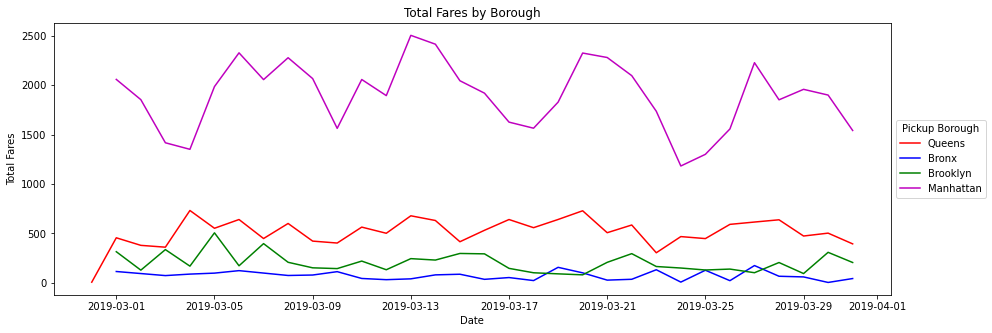

In [228]:
# import packages/libraries
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

# load (and optionally format) dataset
df = pd.read_csv("data/taxis.csv")
df["pickup"] = pd.to_datetime(df["pickup"])
df["dropoff"] = pd.to_datetime(df["dropoff"])

df_gb=df.groupby(by=[pd.Grouper(key="pickup",freq="D"),'pickup_borough'])
df_gb_sum=df_gb.sum().reset_index()

label_names = ["Queens", "Bronx", "Brooklyn", "Manhattan"]

df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Total Fares by Borough")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
plt.legend([plt1, plt2, plt3, plt4], # line objects
           label_names, # line labels
           title = "Pickup Borough", loc = "center left", bbox_to_anchor = (1,0.5))
plt.show()

### Text Annotations

Let's start with adding simple text annotations to our figure, using the **ax.text** function (example [here](https://matplotlib.org/stable/gallery/pyplots/text_commands.html#sphx-glr-gallery-pyplots-text-commands-py)). At its simplest, **ax.test** takes the x,y coordinates for where to position the text, followed by the text string. Let's try this out.

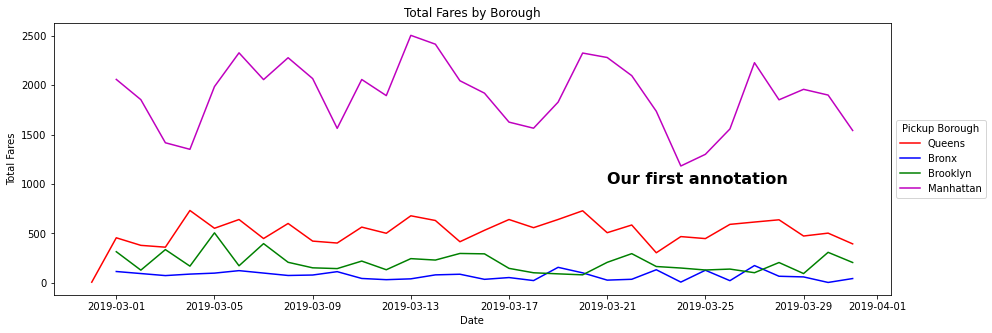

In [229]:
import matplotlib.dates as mdates # We need this library to work with the datetime x-axis

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Total Fares by Borough")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
plt.legend([plt1, plt2, plt3, plt4], # line objects
           label_names, # line labels
           title = "Pickup Borough", loc = "center left", bbox_to_anchor = (1,0.5))

#### OUR FIRST ANNOTATION USING AX.TEXT
text_x = dt.datetime(2019, 3, 21) # Note that we need to convert our x-coordinate, which is a date 
                                  # into a datetime format
ax.text(mdates.date2num(text_x), # text x-coordinate, date2num converts text_x to a number
        1000, # text y-coordinate, note that no conversion is necesarry - matplotlib reads real numbers like we do
        'Our first annotation', # text to annotate
       fontsize = 16, # annotation font size
       fontweight = "bold") # annotation text weight
####

plt.show()

**Exercise:** Add a second annotation to the figure above, at x = 2019-03-05, y = 800. Experiment with the position and font style.

What if we want to add box around our annotation? Easy. We can specify a bounding box with the **bbox** argument.

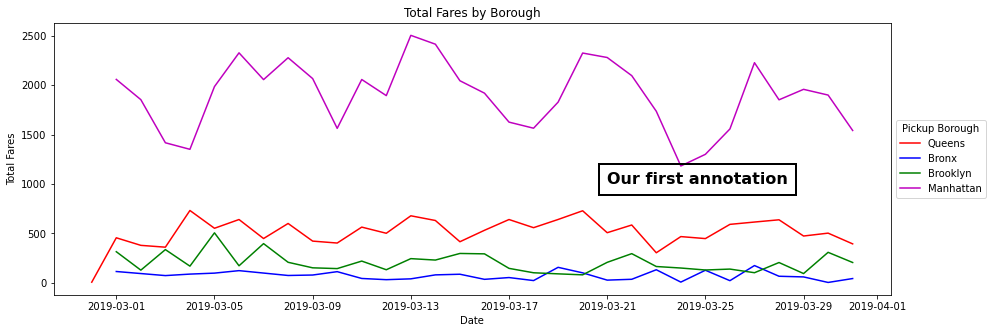

In [232]:
fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Total Fares by Borough")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
plt.legend([plt1, plt2, plt3, plt4], # line objects
           label_names, # line labels
           title = "Pickup Borough", loc = "center left", bbox_to_anchor = (1,0.5))

#### OUR FIRST ANNOTATION USING ax.text
text_x = dt.datetime(2019, 3, 21) # Note that we need to convert our x-coordinate, which is a date 
                                  # into a datetime format
ax.text(mdates.date2num(text_x), # text x-coordinate, date2num converts text_x to a number
        1000, # text y-coordinate, note that no conversion is necesarry - matplotlib reads real numbers like we do
        'Our first annotation', # text to annotate
       fontsize = 16, # annotation font size
       fontweight = "bold", # annotation text weight
       bbox = dict(facecolor = 'none', # Background colour of box
                   edgecolor = 'black', # Edge colour of box
                   linewidth = 2, # Edge width
               alpha = 1, # Transparency of box
               pad =  0.5, # Padding around text
              boxstyle = "square"))
####

plt.show()

**Exercise:** Experiment with the annotation bounding box. Try different box styles from the list [here](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html).

### Annotate with text and arrows

We can use both text and arrows to annotate figures. For this, we'll move from the **ax.text** function to **ax.annotate**. They're similar, but **ax.annotate** also contains calls for the arrow you want to draw. The documentaion for **ax.annotate** is a useful resource (available [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate)). Let's draw an ugly green arrow to start.

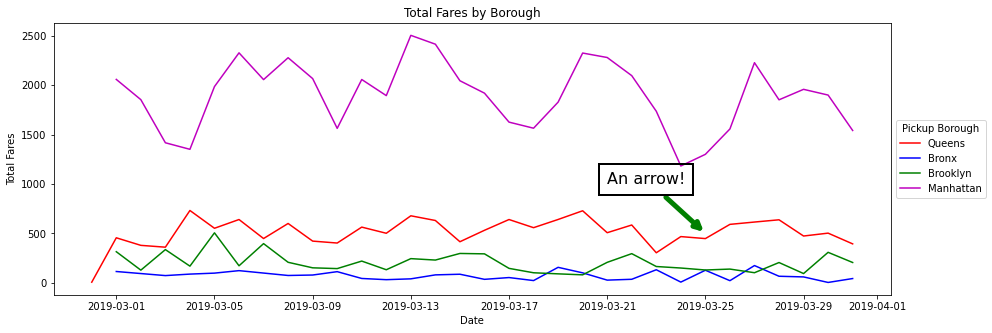

In [233]:
fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Total Fares by Borough")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
plt.legend([plt1, plt2, plt3, plt4], # line objects
           label_names, # line labels
           title = "Pickup Borough", loc = "center left", bbox_to_anchor = (1,0.5))

#### OUR FIRST ANNOTATION USING ax.annotate
text_x = dt.datetime(2019, 3, 21) # Note that we need to convert our x-coordinate, which is a date 
                                  # into a datetime format
annotate_x = dt.datetime(2019,3,25)

ax.annotate("An arrow!", # Our text to annotate
           xytext = (mdates.date2num(text_x), 1000), # The coordinates of our text
           textcoords='data', # Text coordinate system (this will almost always be set to 'data')
            xy =  (mdates.date2num(annotate_x), 500), # The point we're annotating (this is where the arrow points to)
           xycoords = 'data', # Coordinate system (this will almost always be set to 'data')
            fontsize = 16, # Text font size
                  bbox = dict(facecolor = 'none', # Background colour of box
                   edgecolor = 'black', # Edge colour of box
                   linewidth = 2, # Edge width
               alpha = 1, # Transparency of box
               pad =  0.5, # Padding around text
              boxstyle = "square"),
           arrowprops=dict(arrowstyle="-|>", # Our arrow style
                           connectionstyle="arc3", # Our connection style (how the line looks between text and end point)
                           lw = 5,  # Line width for arrow
                          facecolor = "green", # Colour inside arrow edges (if this exists)
                          edgecolor = "green"))  # Colour of line edges
####




plt.show()

**Exercise:** Experiment with the **arrowprops** properties. For example, you can modify **arrowstyle** and **connectionstyle** from the tables of possible options [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch). These [examples](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html#customizing-arrow-and-bubble-styles) show you what some of these options look like.

### Highlighting plot regions with lines and shading

Sometimes we might want to split our plot into multiple regions. In a time series, we might split the plot into two regions with a vertical line - to denote before and after something happened. We can do this with the **ax.axvline** function (documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)). We also might want to shade a region of the figure where something of interest may have occurred. We can do this easily with **ax.vspan** (documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html)). Let's see what these attributes looks like.

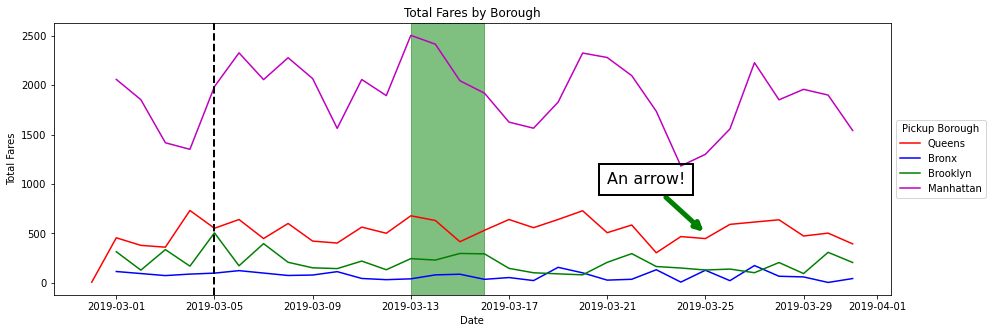

In [234]:
fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Total Fares by Borough")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
plt.legend([plt1, plt2, plt3, plt4], # line objects
           label_names, # line labels
           title = "Pickup Borough", loc = "center left", bbox_to_anchor = (1,0.5))

text_x = dt.datetime(2019, 3, 21) # Note that we need to convert our x-coordinate, which is a date 
                                  # into a datetime format
annotate_x = dt.datetime(2019,3,25)

ax.annotate("An arrow!", # Our text to annotate
           xytext = (mdates.date2num(text_x), 1000), # The coordinates of our text
           textcoords='data', # Text coordinate system (this will almost always be set to 'data')
            xy =  (mdates.date2num(annotate_x), 500), # The point we're annotating (this is where the arrow points to)
           xycoords = 'data', # Coordinate system (this will almost always be set to 'data')
            fontsize = 16, # Text font size
                  bbox = dict(facecolor = 'none', # Background colour of box
                   edgecolor = 'black', # Edge colour of box
                   linewidth = 2, # Edge width
               alpha = 1, # Transparency of box
               pad =  0.5, # Padding around text
              boxstyle = "square"),
           arrowprops=dict(arrowstyle="-|>", # Our arrow style
                           connectionstyle="arc3", # Our connection style (how the line looks between text and end point)
                           lw = 5,  # Line width for arrow
                          facecolor = "green", # Colour inside arrow edges (if this exists)
                          edgecolor = "green"))  # Colour of line edges

##### OUR FIRST VERTICAL LINE WITH ax.axvline
vline_x = dt.datetime(2019,3,5) # # x-coordinate of vertical line

ax.axvline(mdates.date2num(vline_x), # x-coordinate of vertical line
           linestyle = "dashed", # linetype
           c = 'black', # line colour
           linewidth = 2) # line width

##### OUR FIRST SHADED REGION with ax.axvspan
shade_x0 = dt.datetime(2019,3,13) # starting x-coordinate of shaded region
shade_x1 = dt.datetime(2019,3,16) # ending x-coordinate of shaded region

ax.axvspan(mdates.date2num(shade_x0), # start
          mdates.date2num(shade_x1), # end
          color = "green", # shaded region colour
          alpha = 0.5,# shaded region transparency
          zorder = 0) # artist order, lower z orders are plotted first, with others on top. 
                        # higher zorders are plotted above other stuff

plt.show()

**Exercises:** 
1) Move the annotation text and arrow in the figure above, so that it is pointing at the vertical line. Modify the annotation text to give the vertical line meaning (make something up here). \
2) Experiment with the color, transparency and artist order of the shaded area. Then, create a text annotation and position appropriately to give meaning to the shaded region (again, make something up here).

### Saving your visualisations

Let's look at how to save our visualisations as images. This is easy with the **plt.savefig** function (documentation [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)). Let's create and save a simple scatter plot to demonstrate.

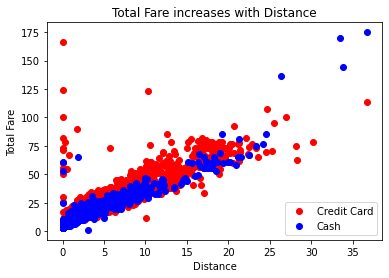

In [268]:
df_card = df[df.payment == "credit card"]
df_cash = df[df.payment == "cash"]

fig, ax = plt.subplots()
ax.scatter(df_card.distance, df_card.total, c = "r")
ax.scatter(df_cash.distance, df_cash.total, c = "b")
ax.set_xlabel("Distance")
ax.set_ylabel("Total Fare")
ax.set_title("Total Fare increases with Distance")
ax.legend(["Credit Card", "Cash"])

fig.savefig(fname = "test_rasterization.png", # Image name
            facecolor = "white", # Background figure colour
            dpi=150, # Resolution, in dots per square inch (the bigger the better resolution, but the larger the image size)
           bbox_inches='tight') # Cuts white space from around plot

plt.show()

**Exercise:** Experiment with the file name, facecolour, dpi and white space of the saved figure above. Change the image format to jpeg.

### TASK: Exploring life in 3 Australian Cities in 2020

A few months into the COVID-19 pandemic, Google released its COVID-19 Community Mobility Report  ([here](https://www.google.com/covid19/mobility/)), which published anonymised location data from mobile users who had location tracking enabled on their mobile devices. The datasets give insight into how peoples' movements changed during the first year of the pandemic. Here, you're going to create and annotate a visualisation of changes in peoples' workplace activity in 2020, in Brisbane, Sydney and Melbourne then finish by saving it. Let's load the data first.

In [272]:
# import packages/libraries
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

# load (and optionally format) dataset
df_cov = pd.read_csv("data/covid_2020.csv")
df_cov["Date"] = pd.to_datetime(df_cov["Date"])
df_cov

,City,Date,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_Stations,Workplaces,Residential
0,Sydney,2020-02-15,6,9,25,14,2,-1
1,Sydney,2020-02-16,2,13,57,8,0,-1
2,Sydney,2020-02-17,-1,6,6,6,9,-1
3,Sydney,2020-02-18,3,4,-1,5,7,-1
4,Sydney,2020-02-19,2,3,11,7,4,-1
...,...,...,...,...,...,...,...,...
958,Melbourne,2020-12-27,-41,-32,-57,-41,-17,2
959,Melbourne,2020-12-28,-42,-33,-32,-68,-73,14
960,Melbourne,2020-12-29,-45,-28,-28,-67,-65,14
961,Melbourne,2020-12-30,-49,-38,-42,-67,-64,15


The dataset contains changes in activity (%) compared to mean February 2020 levels in Groceries and Pharmacies, Parks, Transit Stations, Workplaces and Residential areas (homes). Let's plot a simple visualisation.

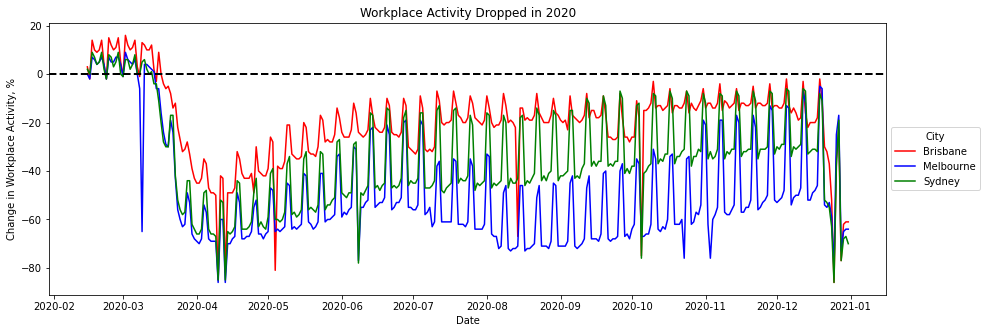

In [274]:
label_names = ["Brisbane", "Melbourne", "Sydney"]

df_cov_0 = df_cov[df_cov.City == label_names[0]]
df_cov_1 = df_cov[df_cov.City == label_names[1]]
df_cov_2 = df_cov[df_cov.City == label_names[2]]

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_cov_0.Date, df_cov_0.Workplaces, c = "r", label = label_names[0])
plt2, = ax.plot(df_cov_1.Date, df_cov_1.Workplaces, c = "b", label = label_names[1])
plt3, = ax.plot(df_cov_2.Date, df_cov_2.Workplaces, c = "g", label = label_names[2])

ax.set_title("Workplace Activity Dropped in 2020")
ax.set_xlabel("Date")
ax.set_ylabel("Change in Workplace Activity, %")
plt.legend([plt1, plt2, plt3], # line objects
           label_names, # line labels
           title = "City", loc = "center left", bbox_to_anchor = (1,0.5))

### Horizontal line at 0%
ax.axhline(0, # y-coordinate of horizontal line
           linestyle = "dashed", # linetype
           c = 'black', # line colour
           linewidth = 2) # line width


plt.show()

**Exercise:** Using faceting and annotations (text, arrows, lines, shading), highlight important dates and periods that help explain the patterns in workplace activity in 2020, across the three cities. You're creating this visualisation for a general audience. When you're finished, save your figure.

A good timeline of important dates related to COVID-19 in Australia can be found [here](https://www.timeout.com/melbourne/things-to-do/a-timeline-of-covid-19-in-australia-two-years-on). Some particularly important dates and periods you might want to consider:\
a) COVID-19 pandemic declared by the World Health Organisation on 11 March 2020.\
b) Full national lockdown from 23 March 2020 to 10 May 2020.\
c) Melbourne returned to lockdown on 08 July 2020 to 28 October 2020.\
d) What explains the large dip at the end of 2020? Was this COVID related, or would you expect to see a dip like that every year?